In [6]:
pip install requests

  Using cached requests-2.26.0-py2.py3-none-any.whl (62 kB)
  Using cached urllib3-1.26.7-py2.py3-none-any.whl (138 kB)
  Using cached charset_normalizer-2.0.7-py3-none-any.whl (38 kB)



In [1]:
import json
import requests
import os
import urllib
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem import Graphs
from rdkit.Chem import rdmolops
from rdkit.Chem import Draw
# with CoordGen
from rdkit.Chem import rdCoordGen
from rdkit.Chem.Draw import MolDrawing, DrawingOptions

In [126]:
IPythonConsole.drawOptions.addAtomIndices = True #индексируем атомы

In [2]:
url = 'https://bitbucket.org/sib-pig/rban/raw/0190ed2f49d6e52d8454f7e99add24a715ece4aa/src/main/resources/molecules/monomer/nrproMonomers.json'
response = requests.get(url)

monomers = json.loads(response.text)
#response.raise_for_status()  # raises exception when not a 2xx response
#if response.status_code != 204:
 #   print(response.text)
  #  monomers = json.loads(response)

In [3]:
monomers

[{'id': 1,
  'cid': '53663068',
  'monomer': 'k-Arg',
  'codes': ['k-Arg'],
  'names': ['alpha-ketoarginine'],
  'smiles': 'N=C(N)NCCCC(N)C(=O)C(=O)O',
  'mwHeavyAtoms': 187.99703986,
  'isNew': False,
  'isIdentified': True,
  'compounds': None,
  'compoundsCount': 0},
 {'id': 2,
  'cid': '2002',
  'monomer': 'Ac-Trp',
  'codes': ['Ac-Trp'],
  'names': ['N-acetyltryptophan'],
  'smiles': 'CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)O',
  'mwHeavyAtoms': 231.99089186,
  'isNew': False,
  'isIdentified': True,
  'compounds': None,
  'compoundsCount': 0},
 {'id': 3,
  'cid': '72602129',
  'monomer': 'iC13:1(3)',
  'codes': ['iC13:1(3)'],
  'names': ['11-methyl-3-dodecenoic acid'],
  'smiles': 'CC(C)CCCCCCC=CCC(O)=O',
  'mwHeavyAtoms': 187.98982924,
  'isNew': False,
  'isIdentified': True,
  'compounds': None,
  'compoundsCount': 0},
 {'id': 4,
  'cid': '13908552',
  'monomer': 'iC16:0-OH(3)',
  'codes': ['iC16:0-OH(3)'],
  'names': ['3-hydroxy-14-methyl-pentadecanoic acid'],
  'smiles': 'CC(C)CCCCC

In [5]:
monomers_dict = {}
for mon in monomers:
    monomers_dict[mon['monomer']] = mon['smiles'] 

In [6]:
print(monomers_dict)

{'k-Arg': 'N=C(N)NCCCC(N)C(=O)C(=O)O', 'Ac-Trp': 'CC(=O)NC(Cc1c[nH]c2ccccc12)C(=O)O', 'iC13:1(3)': 'CC(C)CCCCCCC=CCC(O)=O', 'iC16:0-OH(3)': 'CC(C)CCCCCCCCCCC(O)CC(O)=O', 'bAbu': 'CC(CC(=O)O)N', '3Me-Phe': 'Cc1cccc(c1)CC(N)C(=O)O', 'C6:0-Me(5.5)-oxo(2)': 'CC(C)(C)CCC(=O)C(=O)O', 'NMe-Abu': 'CCC(NC)C(=O)O', 'NAc-4OH-Pro': 'OC1CN(C(C1)C(=O)O)C(=O)C', 'NMe-t-Leu': 'CC(C)(C)C(NC)C(=O)O', 'OH-4Abu': 'NCC(O)CC(=O)O', 'NAc-Dbu': 'CC(N)C(NC(=O)C)C(=O)O', 'Spd': 'NCCCCNCCCN', 'Me-AOA': 'CCCCCCCC(N)C(=O)O', 'Br-OH-Trp': 'NC(Cc1c2cc(O)ccc2[nH]c1Br)C(=O)O', '3OH-5Me-Pro': 'CC1CC(O)C(N1)C(=O)O', 'C12:0': 'CCCCCCCCCCCC(=O)O', 'NMe-3OH-5Me-Pro': 'CC1CC(O)C(N1C)C(=O)O', 'NFo-OMe-Trp': 'COn1cc(CC(NC=O)C(=O)O)c2ccccc21', 'NAc-Hpr': 'O=C(O)C1CCCCN1C(=O)C', 'N1-COOH-bhTrp': 'NC(CCCc1cn(C(=O)O)c2ccccc12)C(=O)O', 'b4Cl-Thr': 'C(C(=O)O)C(O)(CCl)N', 'NFo-bOH-Cl-Tyr': 'N(C(C(=O)O)C(O)c1ccc(O)c(c1)Cl)C=O', 'NAc-Hil': 'CCC(C)CC(NC(=O)C)C(=O)O', 'NMe-Har': 'NC(N)=NCCCCC(NC)C(=O)O', 'NMe-Thr': 'CNC(C(C)O)C(=O)O', '

In [7]:
monomers_dict['Phe']

'NC(Cc1ccccc1)C(=O)O'

Пока что разбираем граф из примера

In [106]:
m1 = Chem.MolFromSmiles(monomers_dict['Phe'])

In [107]:
m2 = Chem.MolFromSmiles(monomers_dict['Ser'])

In [108]:
m3 = Chem.MolFromSmiles(monomers_dict['Cl2-Pro'])

In [109]:
m4 = Chem.MolFromSmiles(monomers_dict['Abu'])

In [110]:
m5 = Chem.MolFromSmiles(monomers_dict['Ser'])

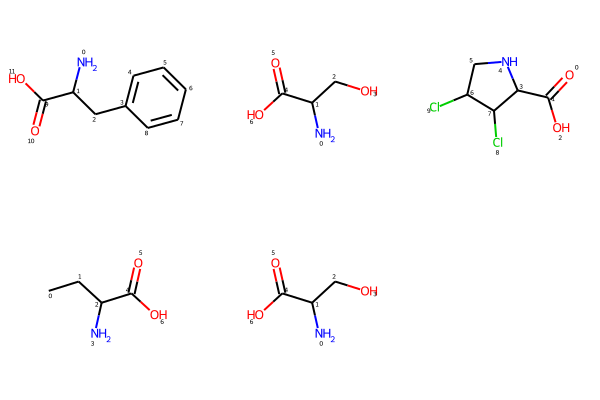

In [127]:
MolsToGridImage((m1, m2, m3, m4, m5)) #так выглядят молекулы, которые надо склеить

In [14]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [55]:
edcombo = Chem.EditableMol(combo)
IPythonConsole.drawOptions.addAtomIndices = True

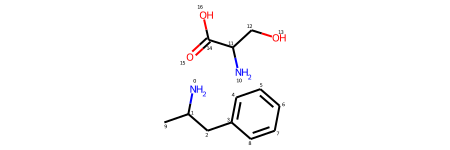

In [56]:
combo

In [57]:
edcombo.AddBond(9,12,order=Chem.rdchem.BondType.SINGLE)

17

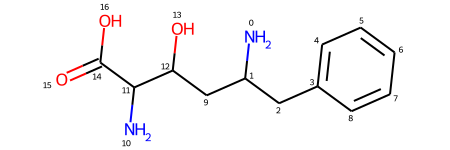

In [58]:
back = edcombo.GetMol()
back

In [106]:
Chem.MolToSmiles(back)

'NC(Cc1ccccc1)CC(O)C(N)C(=O)O'

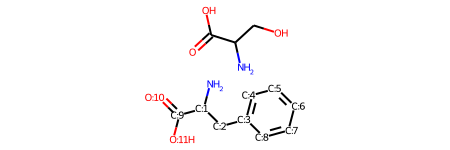

In [21]:
mol = rdmolops.CombineMols(m1,m2)
mol

In [114]:
part_O_C_OH = Chem.MolFromSmarts('C(=O)O')#O=C-OH
m1.GetSubstructMatches(part_O_C_OH)

((9, 10, 11),)

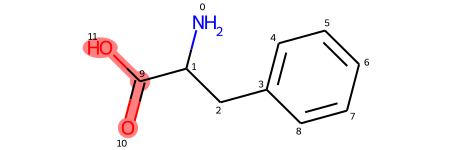

In [115]:
m1

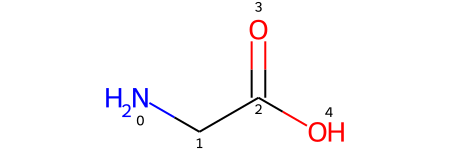

In [117]:
without_radical = Chem.MolFromSmiles('NCC(=O)O')#NH2_C_C_O_OH
without_radical

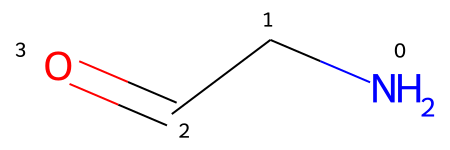

In [118]:
without_OH = Chem.MolFromSmiles('NCC(=O)')#NH2-C-C=O
without_OH

In [119]:
m1.GetSubstructMatches(without_radical)

((0, 1, 9, 10, 11),)

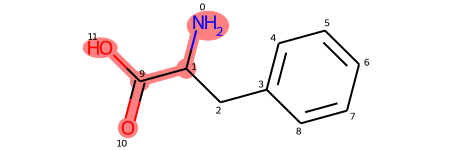

In [120]:
m1

In [123]:
m3.GetSubstructMatches(without_radical)

((4, 3, 1, 0, 2),)

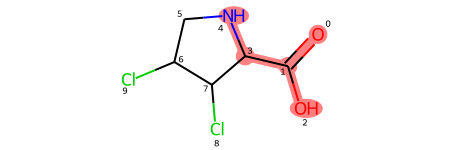

In [124]:
m3

In [125]:
m3.GetSubstructMatches(without_radical)[0][4] #смотрим на часть без радикала и берем -OH

2

In [83]:
mw = Chem.RWMol(m3)

In [84]:
mw.RemoveAtom(m3.GetSubstructMatches(mol2)[0][4])

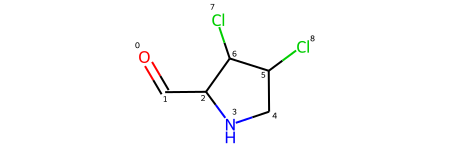

In [85]:
mw

In [90]:
mw.GetSubstructMatches(mol3)

((3, 2, 1, 0),)

In [92]:
mw.GetSubstructMatches(mol3)[0][2]

1

In [93]:
combo = Chem.CombineMols(m1,mw)

In [94]:
edcombo = Chem.EditableMol(combo)


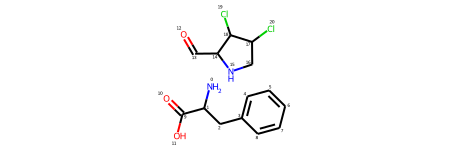

In [96]:
combo

In [97]:
edcombo.AddBond(0,13,order=Chem.rdchem.BondType.SINGLE)

22

In [98]:
back = edcombo.GetMol()

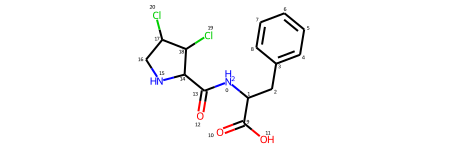

In [99]:
back

In [103]:
back2 = Chem.MolToSmiles(back)
back2

'O=C(O)C(Cc1ccccc1)NC(=O)C1NCC(Cl)C1Cl'

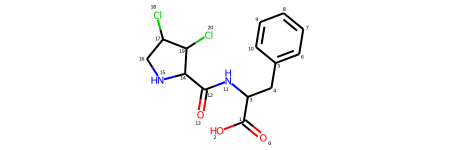

In [104]:
Chem.MolFromSmiles(back2)